## Observations and Insights 

In [149]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
v = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
num_mice = combined_df['Mouse ID'].value_counts()
print(f'There are {len(combined_df)} rows and {len(num_mice)} individual mice in your dataframe.')

There are 1893 rows and 249 individual mice in your dataframe.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'])]
print(duplicates)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
# I saw someone had done a group by mouse ID and Timepoint and then do a value_count
#mice_group = combined_df.groupby(['Mouse ID','Timepoint'])
#mice_group_df = pd.DataFrame(mice_group['Timepoint'].value_counts())
#mice_group_df.head()

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop([909, 911, 913, 915, 917])
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# check the number of mice in the clean data frame
num_mice = clean_df['Mouse ID'].value_counts()
print(f'There are {len(clean_df)} rows and {len(num_mice)} individual mice in your dataframe.')

There are 1888 rows and 249 individual mice in your dataframe.


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugs = clean_df['Drug Regimen'].unique()
drugs

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
bydrug_df = clean_df.groupby('Drug Regimen', sort=False)

drugs_mean = bydrug_df['Tumor Volume (mm3)'].mean()
drugs_median = bydrug_df['Tumor Volume (mm3)'].median()
drugs_var = bydrug_df['Tumor Volume (mm3)'].var()
drugs_std = bydrug_df['Tumor Volume (mm3)'].std()
drugs_sem = bydrug_df['Tumor Volume (mm3)'].sem()


In [10]:
# Assemble the resulting series into a single summary dataframe.
groupby_summ_df = pd.DataFrame({'Drug Regimen': drugs,
                                'Mean': drugs_mean, 
                                'Median': drugs_median, 
                                'Variance': drugs_var, 
                                'Standard Deviation':drugs_std, 
                                'SEM': drugs_sem})
groupby_summ_df 

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Ramicane,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862


In [11]:
# Using the aggregation method, produce the same summary statistics in a single line
df_agg = bydrug_df.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std','sem']})
df_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

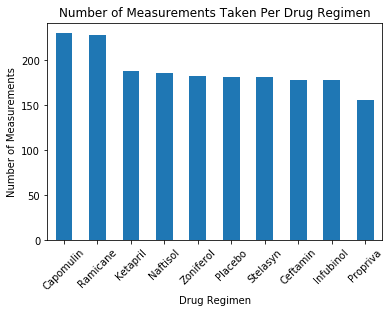

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugs = clean_df['Drug Regimen'].unique()
drug_counts = clean_df['Drug Regimen'].value_counts()
drugmeas_df = pd.DataFrame({'Drug Regimen': drugs,
                           'Number of Measurements': drug_counts})
drugmeas_df.plot.bar(rot=45, title='Number of Measurements Taken Per Drug Regimen', legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')

plt.show()

# bar chart of how many times each drug was given.

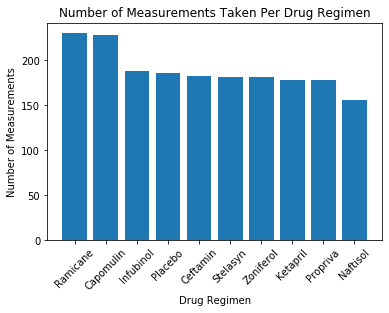

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = clean_df['Drug Regimen'].unique()
drug_counts = clean_df['Drug Regimen'].value_counts()

plt.bar(drugs, drug_counts)
plt.title('Number of Measurements Taken Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.xticks(rotation=45)
plt.show()

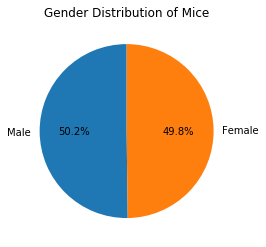

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create a new dataframe with info on just each mouse once
mice_sex_df = clean_df.drop_duplicates(subset=['Mouse ID','Sex'])

# Find the value counts of Sex and then plot the results
mice_sex_df['Sex'].value_counts().plot.pie(title='Gender Distribution of Mice', startangle=90, autopct='%1.1f%%')
plt.ylabel('')
plt.show()

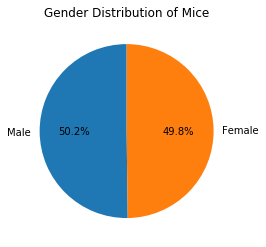

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create labels for the Sex of Mice
labels = mice_sex_df['Sex'].unique()

# Use the same data from above and create the same pie chart with pyplot instead
plt.pie(mice_sex_df['Sex'].value_counts(), labels=labels, startangle=90, autopct='%1.1f%%')
plt.title('Gender Distribution of Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [139]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

#Delete drug regimens I don't need
four_df = clean_df[(clean_df['Drug Regimen'] == 'Capomulin') | (clean_df['Drug Regimen'] == 'Ramicane') |\
                          (clean_df['Drug Regimen'] == 'Infubinol') | (clean_df['Drug Regimen'] == 'Ceftamin')]

#find the max timepoint



#merge back to get new dataframe with desired values
#four_df_merged = pd.merge(four_df, combined_df, how='inner')
max_df

SyntaxError: invalid syntax (<ipython-input-139-e7f01d8c9729>, line 8)

In [114]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = four_df_merged['Tumor Volume (mm3)'].quantile([.25, .5,.75]) 
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f'The lower quartile of Tumor Volume is: {lowerq}')
print(f'The upper quartile of Tumor Volume is: {upperq}')
print(f'The interquartile range of Tumor Volume is: {iqr}')
print(f'The median of Tumor Volume is: {quartiles[0.5]}')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'Values below {lower_bound} could be outliers')
print(f'Values above {upper_bound} could be outliers')
    

The lower quartile of Tumor Volume is: 33.48002734
The upper quartile of Tumor Volume is: 62.14221369
The interquartile range of Tumor Volume is: 28.66218635
The median of Tumor Volume is: 40.1592203
Values below -9.513252184999999 could be outliers
Values above 105.135493215 could be outliers


In [115]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatment=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]

for drug in drug_treatment:
    row = four_df_merged.loc[four_df_merged['Drug Regimen'] == drug]
    tumor_volume.append(row['Tumor Volume (mm3)'])

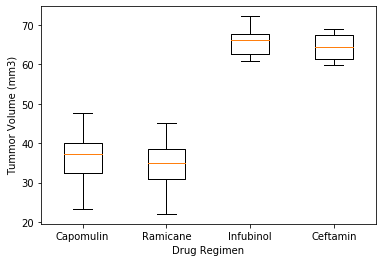

In [118]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume, labels=drug_treatment)
plt.ylabel('Tummor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()


## Line and Scatter Plots

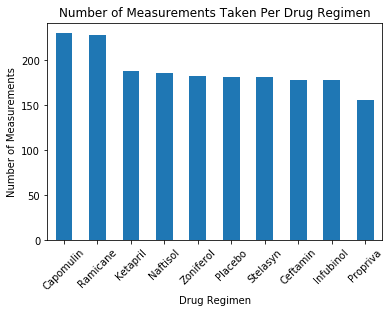

In [54]:
drugs = clean_df['Drug Regimen'].unique()
drug_counts = clean_df['Drug Regimen'].value_counts()
drugmeas_df = pd.DataFrame({'Drug Regimen': drugs,
                           'Number of Measurements': drug_counts})
drugmeas_df.plot.bar(rot=45, title='Number of Measurements Taken Per Drug Regimen', legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')

plt.show()

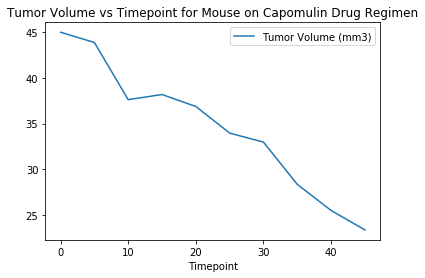

In [71]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185_df = clean_df.loc[(clean_df['Mouse ID'] == 's185')]
s185_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.title('Tumor Volume vs Timepoint for Mouse on Capomulin Drug Regimen')
plt.show()

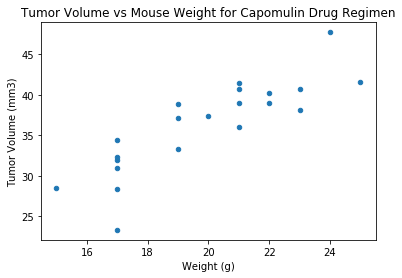

In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = four_df_merged.loc[(four_df_merged['Drug Regimen'] == 'Capomulin')]
capomulin_df.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
plt.title('Tumor Volume vs Mouse Weight for Capomulin Drug Regimen')
plt.show()

In [145]:
capomulin_df['Tumor Volume (mm3)'].mean()

36.2361138

## Correlation and Regression

In [150]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capomulin_df['Weight (g)']
av_volume = capomulin_df['Tumor Volume (mm3)']
corr = st.pearsonr(weight, av_volume)
print(f'The correlation coefficient between Weight and Tumor Volume is {round(corr[0],2)}')

The correlation coefficient between Weight and Tumor Volume is 0.85


The r-squared is: 0.720923104644634


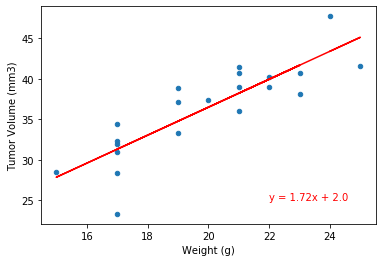

In [174]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, av_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
capomulin_df.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(22,25), color='red')
print(f"The r-squared is: {rvalue**2}")
plt.show()